## Задача классификации


Классификация - это задача подбора разделяющей гиперповерхности между классами target в пространстве признаков.

## Метрики классификации

Самая простая метрика - accuracy:

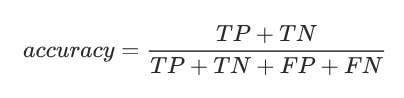

Она означает отношение всех правильных ответов вообще ко всем ответам.

In [ ]:
# Реализуем ее для бинарной классификации
import numpy as np

def accuracy(y_true, y_pred):
  return (y_true == y_pred).sum() / len(y_true)

In [ ]:
# протестируем на искуственных данных
y_true = np.array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1])
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1])
accuracy(y_true, y_pred)

0.7272727272727273

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными.

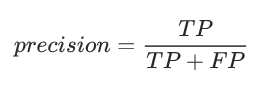

In [ ]:
def precision(y_true, y_pred):
  return ((y_pred==1)&(y_true==1)).sum() / (((y_pred==1)&(y_true==1)).sum() + ((y_pred==1)&(y_true==0)).sum())

In [ ]:
precision(y_true, y_pred)

0.6666666666666666

Recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

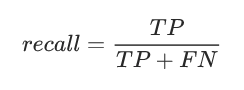

**Домашнее задание**. Реализовать реколл.

## Логистическая регрессия.

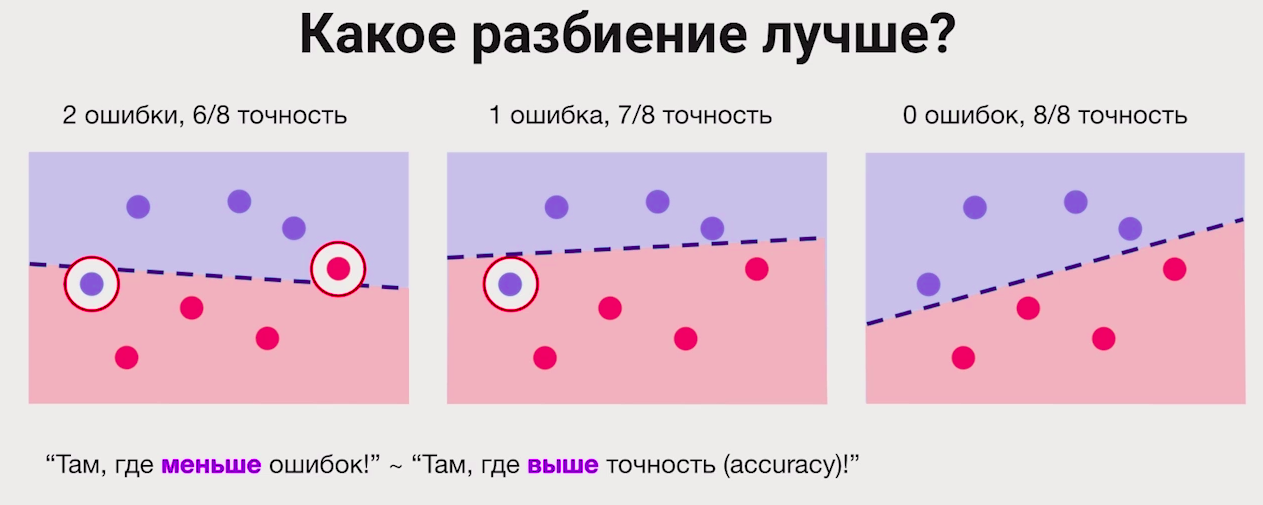

Изначально кажется логичным выбрать такое разбиение, которое максимизирует метрику - например, accuracy.

Но если рассмотреть следующие разбиения:

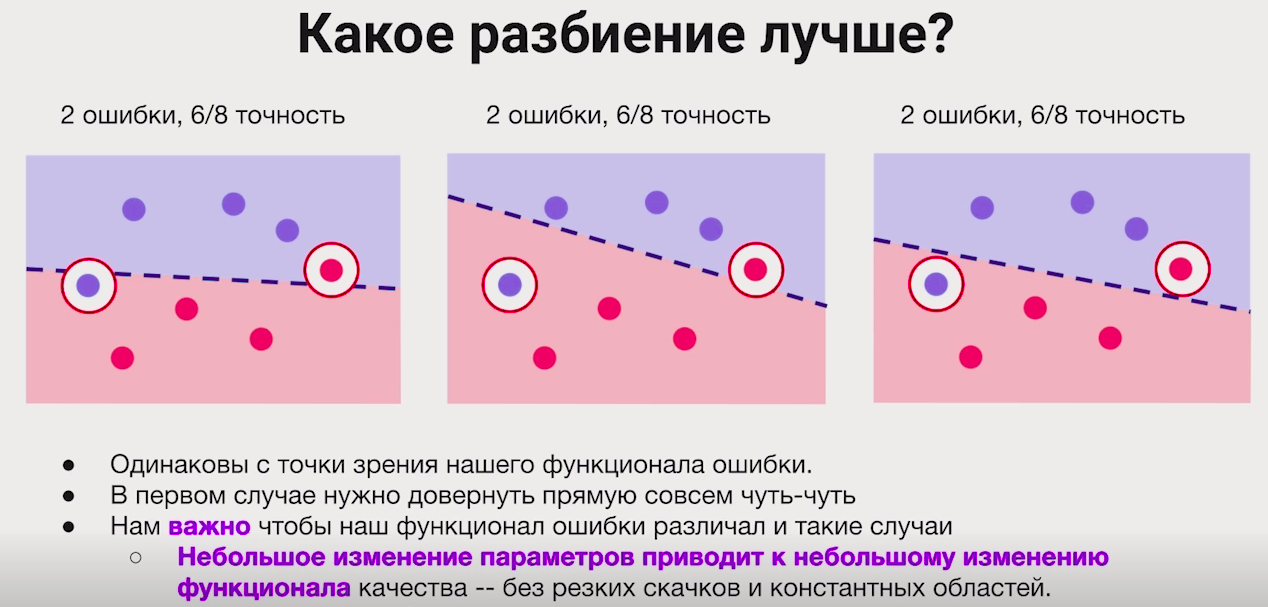

Какое из них лучше? Кажется, что первое, потому что если довернуть прямую совсем немного, мы получим правильное разбиение, без ошибок. Как это учесть в функционале качества?

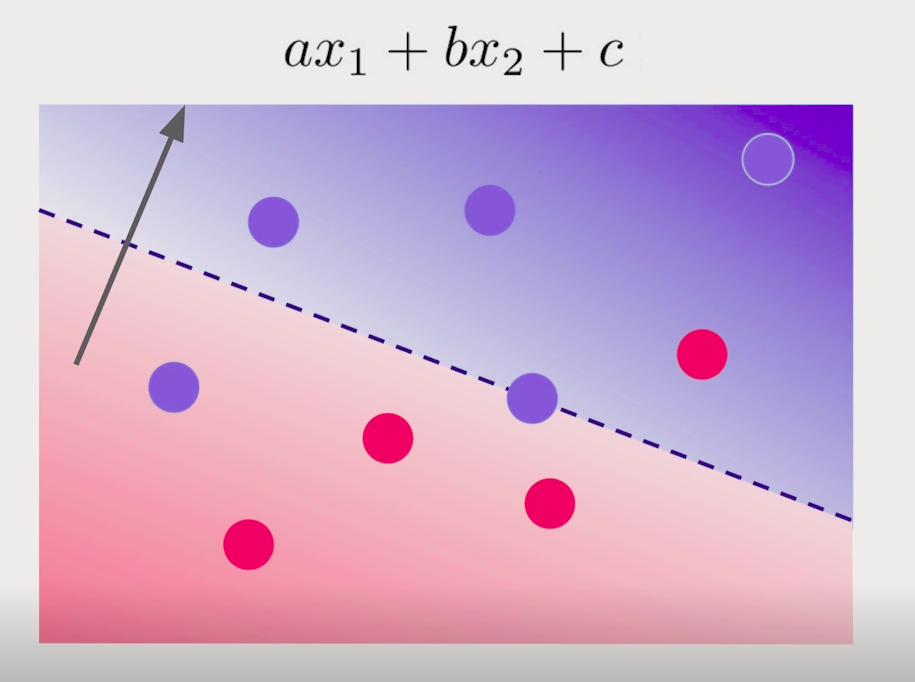

Попробуем относиться к значению вдоль нормали как к вероятности отнесения объекта к положительному или отрицательному классу.

Правдоподобие:

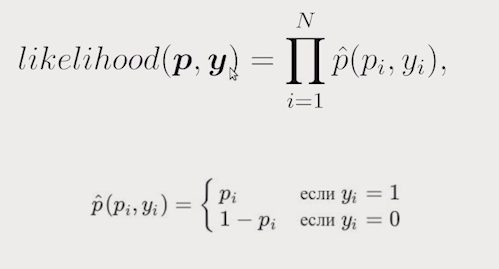

Negative LogLikelihood:

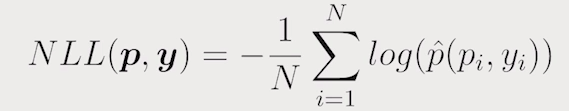

это функционал ошибки в задаче классификации. По-другому ее иногда называют бинарная кросс-энтропия, логлосс. Чем меньше эта функция, тем лучше модель.

В случае логистической регрессии мы используем логистическую функцию:

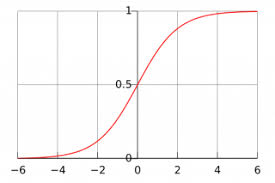

image.png

Ее производная:

image.png

Плотность вероятности в бинарной классификации:

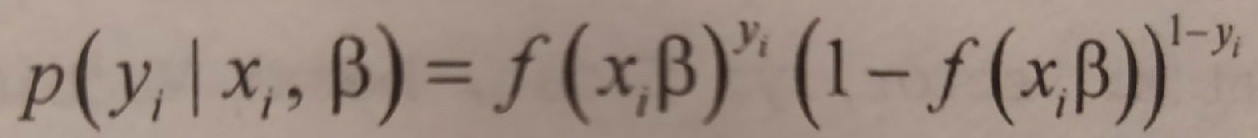

Логарифмическое правдоподобие:

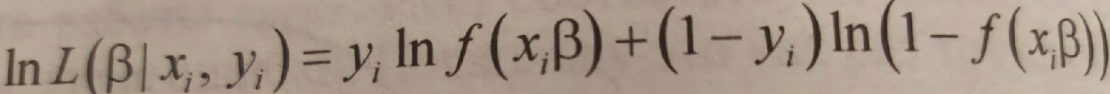

In [7]:
import math
def logistic(x):
  return 1 / (1 + math.exp(-x))

In [8]:
def logistic_diff(x):
  return logistic(x) * (1 - logistic(x))

In [10]:
def _negative_log_likelihood(x, y, beta):
  if y == 1:
    return -math.log(logistic(x.dot(beta)))
  return -math.log(1 - logistic(x.dot(beta)))

Если все точки независимы друг от друга, то полное правдоподобие:

In [11]:
def negative_log_likelihood(x, y, beta):
  return sum(_negative_log_likelihood(x_, y_, beta_) for x_, y_, beta_ in zip(x, y))

**Домашнее задание**. Реализовать логрег методом градиентного спуска.